In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
customers = pd.read_csv('Ecommerce customers')

In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train, test = train_test_split(customers, test_size=0.2, random_state=42)

In [6]:
train.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,33.061248,12.057716,37.020787,3.568064,501.992151
std,0.987723,0.999140,1.017650,1.027884,81.181884
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.335151,11.393568,36.311681,2.956254,445.577927
50%,33.102898,12.012108,37.041938,3.589728,502.010396
75%,33.736793,12.759760,37.684273,4.142304,554.182841
max,35.860237,15.126994,39.672591,6.922689,765.518462


In [7]:
#train.groupby('Avatar')['Avg. Session Length'].sum().sort_values(ascending = False)

In [8]:
#train.groupby('Avatar')['Time on App'].sum().sort_values(ascending = False)

In [9]:
#train.groupby('Avatar')['Time on Website'].sum().sort_values(ascending = False)

In [10]:
#train.groupby('Avatar')['Yearly Amount Spent'].sum().sort_values(ascending = False)

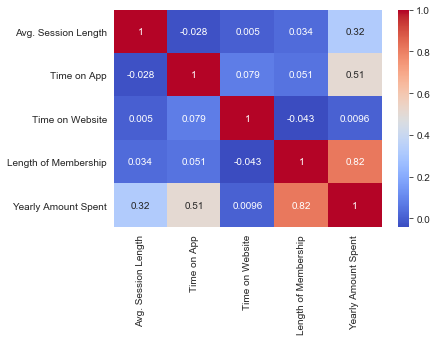

In [11]:
sns.heatmap(train.corr(), cmap = 'coolwarm', annot = True)

In [12]:
train = train.drop(['Email','Address', 'Avatar'], axis = 1)

test = test.drop(['Email','Address', 'Avatar'], axis = 1)

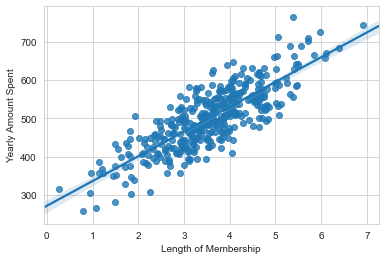

In [13]:
sns.regplot(x = train['Length of Membership'], y = train['Yearly Amount Spent'])

In [14]:
#sns.pairplot(train)

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

In [16]:
train.head(2)
y_train= train['Yearly Amount Spent']
X_train = train.drop(['Yearly Amount Spent'], axis = 1)

test.head(2)
y_test= test['Yearly Amount Spent']
X_test = test.drop(['Yearly Amount Spent'], axis = 1)

In [17]:
numerical_col = ['Avg. Session Length', 'Time on App', 'Time on Website',
   'Length of Membership']

numerical_transformer = Pipeline(steps = [('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_col)])

model = LinearRegression()

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model)])

my_pipeline.fit(X_train, y_train)

pred = my_pipeline.predict(X_test)

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
np.sqrt(mean_squared_error(y_test,pred))

10.481590584636491

In [20]:
coef = my_pipeline.named_steps['model'].coef_
coef = np.array(coef)

In [21]:
pd.DataFrame(coef, index = X_train.columns, columns=['Coeffient'] )

,Coeffient
Avg. Session Length,25.250381
Time on App,38.703501
Time on Website,0.315469
Length of Membership,63.543211


In [22]:
inte = my_pipeline.named_steps['model'].intercept_
inte

501.9921512124531